In [29]:
%load_ext autoreload
%autoreload 2
import matplotlib.pyplot as plt

from lens_simulation import utils
from lens_simulation.SimulationUtils import SimulationParameters
from lens_simulation.Medium import Medium
from lens_simulation.Lens import Lens, LensType
from lens_simulation.beam import Beam, BeamSettings, BeamShape, BeamSpread, DistanceMode

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [30]:
beam_settings = BeamSettings(
    distance_mode=DistanceMode.Direct,
    beam_spread=BeamSpread.Plane, 
    beam_shape=BeamShape.Circular,
    width= 100e-6,
    height= 50e-6,
    position=[-0e-6, 0e-6],
    source_distance = 10e-6,
    final_width = 1e-6
)


sim_parameters = SimulationParameters(
    A = 10000, 
    pixel_size=1e-6, 
    sim_wavelength = 488e-9,
    sim_width = 1500e-6,
    lens_type=LensType.Spherical
)

output_medium = Medium(1.33)


In [31]:
# beam settings
print(f"Beam Settings: {beam_settings}")
    

Beam Settings: BeamSettings(distance_mode=<DistanceMode.Direct: 1>, beam_spread=<BeamSpread.Plane: 1>, beam_shape=<BeamShape.Circular: 1>, width=0.0001, height=5e-05, position=[-0.0, 0.0], theta=0.0, numerical_aperture=None, tilt=None, source_distance=1e-05, final_width=1e-06, focal_multiple=None)


In [32]:
beam = Beam(beam_settings)
print("beam generated")

The plane wave if constant along the optical axis. The beam final_width has been set to the initial width: 1.00e-04m
Only DistanceMode.Direct is supported for BeamSpread.Plane. The distance_mode has been set to DistanceMode.Direct.
The beam_shape (BeamShape.Circular) requires a symmetric beam. The beam height has been set to the beam width: 1.00e-04m 
beam generated


In [33]:
beam.generate_profile(sim_parameters)
print("beam profile generated")

beam profile generated


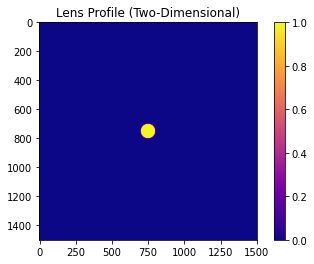

In [34]:
fig = utils.plot_lens_profile_2D(beam.lens)
plt.show()

In [35]:
sd, fd = beam.calculate_propagation_distance()
print(sd, fd)

0 1e-05
